In [56]:
import cv2
import tifffile as tiff

import os
import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import binary_dilation, disk
from skimage import io
from tqdm import tqdm
import time

In [20]:
SEQ = '02'
path = f'/home/xlux/PROJECTS/DATA/Fluo-N2DL-HeLa/{SEQ}_GT/SEG'

for filename in os.listdir(path):
    mask = cv2.imread(os.path.join(path, filename), cv2.IMREAD_ANYDEPTH) > 0
    mask_dil = binary_dilation(mask, disk(10)) * 1
    mask_name = filename.replace('man_seg', 'mask')
    cv2.imwrite(os.path.join(path, mask_name), mask_dil)


[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [82]:


TRAS = [
'DIC-C2DH-HeLa/01_GT/TRA',
'DIC-C2DH-HeLa/02_GT/TRA',
'Fluo-N2DL-HeLa/01_GT/TRA',
'Fluo-N2DL-HeLa/02_GT/TRA',
'PhC-C2DH-U373/01_GT/TRA',
'PhC-C2DH-U373/02_GT/TRA',
'Fluo-N2DH-GOWT1/01_GT/TRA',
'Fluo-N2DH-GOWT1/02_GT/TRA',
'BF-C2DL-MuSC/01_GT/TRA',
'BF-C2DL-MuSC/02_GT/TRA',
'BF-C2DL-HSC/01_GT/TRA',
'BF-C2DL-HSC/02_GT/TRA',
'Fluo-C2DL-MSC/01_GT/TRA',
'Fluo-C2DL-MSC/02_GT/TRA',
]
TRAS = [
 'Fluo-N3DH-CHO/01_GT/TRA_2D',
 'Fluo-N3DH-CHO/02_GT/TRA_2D',
 'Fluo-N3DH-CE/01_GT/TRA_2D',
 'Fluo-N3DH-CE/02_GT/TRA_2D',
#  'Fluo-C3DH-A549/01_GT/TRA',
#  'Fluo-C3DH-A549/02_GT/TRA',
#  'PhC-C2DL-PSC/01_GT/TRA',
#  'PhC-C2DL-PSC/02_GT/TRA',
#  'Fluo-C3DL-MDA231/01_GT/TRA_2D',
#  'Fluo-C3DL-MDA231/02_GT/TRA_2D'

]

for i, tra in enumerate(TRAS):
    print(f'{i+1}/{len(TRAS)}: {tra}')
    time.sleep(1)
    path = '/home/xlux/PROJECTS/DATA'
    tra_path = os.path.join(path, tra)
    assert os.path.isdir(tra_path), tra_path
    
    cnt_path = tra_path + '_CNT'
    if not os.path.isdir(cnt_path):
        os.mkdir(cnt_path)
        print(f'{cnt_path} was created')
    
    for maskname in tqdm(os.listdir(tra_path)):
        if '.tif' not in maskname:
            continue
        src_path = os.path.join(tra_path, maskname)
        dst_path = os.path.join(cnt_path, maskname)
        mask = io.imread(src_path)
        mask = markers_by_centroids(mask)
#         plt.imshow(mask)
#         plt.show()
#         print(np.unique(mask))
        cv2.imwrite(dst_path, mask)
#         break



1/4: Fluo-N3DH-CHO/01_GT/TRA_2D


  2%|▏         | 11/460 [00:00<00:04, 106.82it/s]

/home/xlux/PROJECTS/DATA/Fluo-N3DH-CHO/01_GT/TRA_2D_CNT was created


100%|██████████| 460/460 [00:03<00:00, 142.80it/s]


2/4: Fluo-N3DH-CHO/02_GT/TRA_2D


  3%|▎         | 13/460 [00:00<00:03, 124.98it/s]

/home/xlux/PROJECTS/DATA/Fluo-N3DH-CHO/02_GT/TRA_2D_CNT was created


100%|██████████| 460/460 [00:03<00:00, 147.34it/s]


3/4: Fluo-N3DH-CE/01_GT/TRA_2D


  0%|          | 4/6825 [00:00<03:06, 36.55it/s]

/home/xlux/PROJECTS/DATA/Fluo-N3DH-CE/01_GT/TRA_2D_CNT was created


100%|██████████| 6825/6825 [01:31<00:00, 74.65it/s]


4/4: Fluo-N3DH-CE/02_GT/TRA_2D


  0%|          | 7/5890 [00:00<01:30, 65.19it/s]

/home/xlux/PROJECTS/DATA/Fluo-N3DH-CE/02_GT/TRA_2D_CNT was created


100%|██████████| 5890/5890 [01:20<00:00, 72.78it/s]


In [79]:
MARKER_DIAMETER = 6

def markers_by_centroids(img):
    
    kernel = disk(MARKER_DIAMETER)
    
    new_image = np.zeros(img.shape, dtype=np.uint16)
    labelIDs = np.delete(np.unique(img), 0)
    
    for labelID in labelIDs:
        
        assert labelID != 0
        mask = (img == labelID).astype(np.uint8)
        
        M = cv2.moments(mask)
        cX = int(M["m01"] / M["m00"])
        cY = int(M["m10"] / M["m00"])
        new_image[cX, cY] = labelID
    

        
    return cv2.dilate(new_image, kernel)

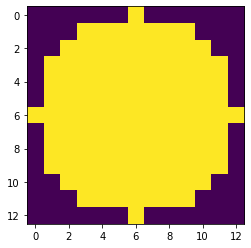

In [78]:
plt.imshow(disk(6))
plt.show()